In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
diabetic_dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [8]:
diabetic_dataset.shape

(100000, 9)

In [9]:
diabetic_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
diabetic_dataset.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [11]:
#diabetic_dataset.drop(['gender'],axis=1)

In [12]:
#diabetic_dataset.drop(['smoking_history'],axis=1)

In [13]:
diabetic_dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [14]:
diabetic_dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [15]:
diabetic_dataset['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [16]:
diabetic_dataset['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [17]:
#sns.catplot(x='diabetes',data = diabetic_dataset , kind = 'count')

In [18]:
#plot = plt.figure(figsize = (5,5))
#sns.barplot(x='diabetes', y='age',data = diabetic_dataset)

In [19]:
correlation = diabetic_dataset.corr()

<ipython-input-19-08d52160405e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = diabetic_dataset.corr()


<Axes: >

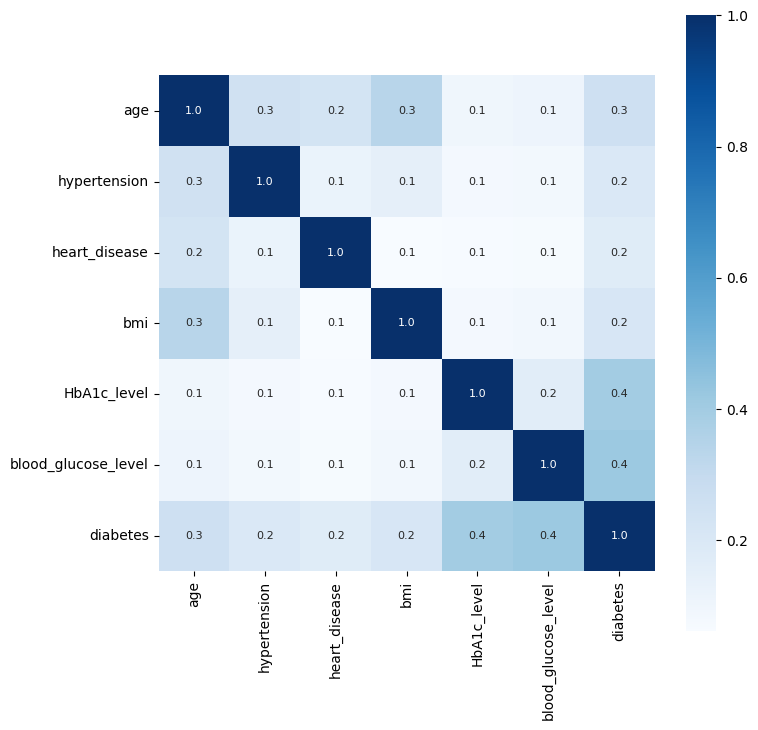

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar='True', square='True', fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(le)

LabelEncoder()


In [22]:
diabetic_dataset['gender'] = le.fit_transform(diabetic_dataset['gender'])

In [23]:
diabetic_dataset['gender'].unique()

array([0, 1, 2])

In [24]:
diabetic_dataset['smoking_history'] = le.fit_transform(diabetic_dataset['smoking_history'])

In [25]:
diabetic_dataset['smoking_history'].unique()

array([4, 0, 1, 3, 2, 5])

In [26]:
X = diabetic_dataset.drop('diabetes',axis=1)

In [27]:
print(X)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1  

In [28]:
Y = diabetic_dataset['diabetes']

In [29]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 3)

In [31]:
print(Y.shape, Y_train.shape, Y_test.shape)

(100000,) (80000,) (20000,)


In [32]:
model = RandomForestClassifier()

In [33]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [34]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [35]:
print("Accuracy :",test_data_accuracy)

Accuracy : 0.971


In [36]:
# Building Prediction System
input_data = (1,67.0,0,1,5,27.32,6.5,200)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction == 1):
  print("Diabetic Patient")
else:
  print("Not a diabetic Patient")

[1]
Diabetic Patient


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
